# Описание проекта

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

# 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
import numpy as np
from numpy.random import RandomState

In [2]:
from scipy import stats as st

In [3]:
import matplotlib.pyplot as plt

In [4]:
#geo_data_0 = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter\\ML3 - project\\datasets\\geo_data_0.csv')
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')

In [5]:
#geo_data_1 = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter\\ML3 - project\\datasets\\geo_data_1.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')

In [6]:
#geo_data_2 = pd.read_csv('C:\\Users\\user\\Desktop\\Jupyter\\ML3 - project\\datasets\\geo_data_2.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [7]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [9]:
geo_data_0['id'].value_counts()

74z30    2
QcMuo    2
Tdehs    2
TtcGQ    2
A5aEY    2
        ..
3sxY1    1
Lnw6i    1
pXDsP    1
aDimv    1
LGVeA    1
Name: id, Length: 99990, dtype: int64

In [10]:
geo_data_0[geo_data_0['id'] == 'A5aEY']

,id,f0,f1,f2,product
3389,A5aEY,-0.039949,0.156872,0.209861,89.249364
51970,A5aEY,-0.180335,0.935548,-2.094773,33.020205


In [11]:
geo_data_0[geo_data_0['id'] == 'HZww2']

,id,f0,f1,f2,product
931,HZww2,0.755284,0.368511,1.863211,30.681774
7530,HZww2,1.061194,-0.373969,10.430210,158.828695


In [12]:
geo_data_0[geo_data_0['id'] == 'TtcGQ']

,id,f0,f1,f2,product
60140,TtcGQ,0.569276,-0.104876,6.440215,85.350186
92341,TtcGQ,0.110711,1.022689,0.911381,101.318008


In [13]:
geo_data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [14]:
geo_data_1['id'].value_counts()

bfPNe    2
wt4Uk    2
5ltQ6    2
LHZR0    2
EewiE    1
        ..
WagJd    1
TPxLO    1
GdDyI    1
fUg4Q    1
DfNpy    1
Name: id, Length: 99996, dtype: int64

In [15]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [16]:
geo_data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [17]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [18]:
geo_data_2['id'].value_counts()

Vcm5J    2
xCHr8    2
KUPhW    2
VF7Jo    2
WBB0V    1
        ..
wpRXA    1
B52Ya    1
ZrSK2    1
mbalP    1
sN5ZM    1
Name: id, Length: 99996, dtype: int64

##### В данных пропусков нет. Дропнем колонки id, они не нужны для обучения модели.

In [19]:
geo_data_0 = geo_data_0.drop(['id'], axis=1)

In [20]:
geo_data_1 = geo_data_1.drop(['id'], axis=1)

In [21]:
geo_data_2 = geo_data_2.drop(['id'], axis=1)

In [22]:
geo_data_2

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


# 2. Обучение и проверка модели

#### Начнем с данным за первый регион.   
Подготовим данные, разделим их на выборки

In [23]:
geo_data_0

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


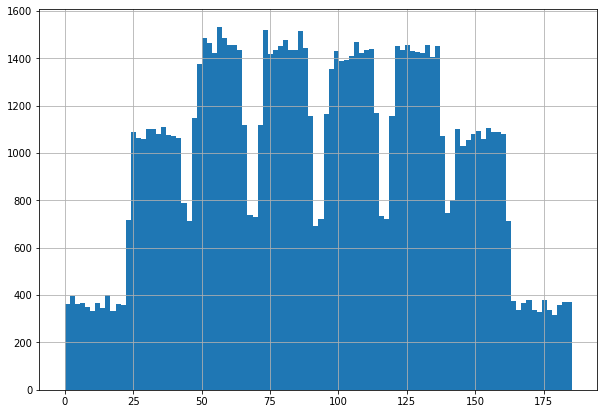

In [24]:
geo_data_0['product'].hist(bins=100, figsize=(10,7))

In [25]:
target_0 = geo_data_0['product']

In [26]:
features_0 = geo_data_0.drop(['product'], axis=1)

In [27]:
train_target_0, valid_target_0, train_features_0, valid_features_0 = train_test_split(target_0, features_0, test_size = 0.25,
                                                                                      random_state = 42)

#### Второй регион

In [28]:
geo_data_1

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


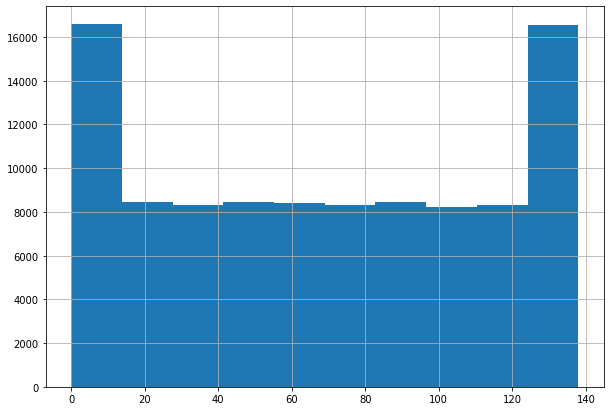

In [29]:
geo_data_1['product'].hist(bins=10, figsize=(10,7))

In [30]:
target_1 = geo_data_1['product']

In [31]:
features_1 = geo_data_1.drop(['product'], axis=1)

In [32]:
train_target_1, valid_target_1, train_features_1, valid_features_1 = train_test_split(target_1, features_1, test_size = 0.25,
                                                                                      random_state = 42)

#### Третий регион

In [33]:
geo_data_2

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


In [34]:
geo_data_2['product'].sum()

9500000.000000004

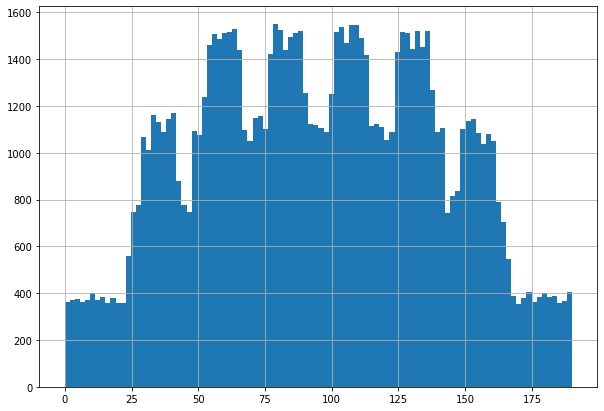

In [35]:
geo_data_2['product'].hist(bins=100, figsize=(10,7))

In [36]:
target_2 = geo_data_2['product']

In [37]:
features_2 = geo_data_2.drop(['product'], axis=1)

In [38]:
train_target_2, valid_target_2, train_features_2, valid_features_2 = train_test_split(target_2, features_2, test_size = 0.25,
                                                                                      random_state = 42)

Обучим 3 модели линейной регрессии на данных из 3х регионов, посчитаем средний предсказанный запас сырья и RMSE по каждой из них.

In [39]:
def train_model(features, target, prediction, regoin):
    model = LinearRegression()
    model.fit(features, target)
    predict = model.predict(prediction)
    return predict
predict_0 = train_model(train_features_0, train_target_0, valid_features_0, 1)
predict_1 = train_model(train_features_1, train_target_1, valid_features_1, 2)
predict_2 = train_model(train_features_2, train_target_2, valid_features_2, 3)

In [40]:
print('Средний запас предсказанного сырья регион 1:',predict_0.mean())
print('Средний запас предсказанного сырья регион 2:',predict_1.mean())
print('Средний запас предсказанного сырья регион 3:',predict_2.mean())

Средний запас предсказанного сырья регион 1: 92.39879990657768
Средний запас предсказанного сырья регион 2: 68.71287803913764
Средний запас предсказанного сырья регион 3: 94.77102387765939


In [41]:
print('RMSE:')
print('Регион 1:', sqrt(mean_squared_error(valid_target_0, predict_0)))
print('Регион 2:', sqrt(mean_squared_error(valid_target_1, predict_1)))
print('Регион 3:', sqrt(mean_squared_error(valid_target_2, predict_2)))

RMSE:
Регион 1: 37.75660035026169
Регион 2: 0.8902801001028828
Регион 3: 40.145872311342174


#### Вывод:
Чем выше средий запас предсказанного сырья, тем сильнее модель линейной регрессии ошибается, также это зависит и от дисперсии.
Например, в регионе 1 предсказано в среднем 92.4 единицы сырья на скважину, при этом модель ошибается на +/- 37.75 единиц.  
И наоборот, в регионе 2, где средние запасы предсказанного сырья самые низкие, модель ошибается всего лишь на 0.9 единиц.

# 3. Подготовка к расчёту прибыли

Из условия задачи необходимо рассчитать, какой объем сырья необходимо добыть для безубыточной разработки скважины.   
Бюджет региона - 10.000.000.000 руб, с одной единицы продукта (1тыс баррелей) получаем 450.000, в регионе планируется к разработке 200 скважин.   

In [42]:
aver_min_budg = 10000000000 / 200

In [43]:
aver_min_budg

50000000.0

In [44]:
aver_min_stock = (10000000000 / 450000) / 200

In [45]:
aver_min_stock

111.11111111111111

In [46]:
budget = 10000000000

In [47]:
income_1_unit = 450000

Чтобы разработка не была убыточной, одна скважина в среднем должна приносить минимум 50 млн дохода и иметь минимум запаса 111.1 тонны.

In [48]:
print('Средние запасы в регионе 1:', geo_data_0['product'].mean())
print('Средние запасы в регионе 2:', geo_data_1['product'].mean())
print('Средние запасы в регионе 3:', geo_data_2['product'].mean())

Средние запасы в регионе 1: 92.50000000000001
Средние запасы в регионе 2: 68.82500000000002
Средние запасы в регионе 3: 95.00000000000004


Самый перспективный регион по средним запасам - это регион 3.

# 4. Расчёт прибыли и рисков 

4.1. Выберите скважины с максимальными значениями предсказаний.

In [49]:
predict_0 = pd.Series(predict_0)

In [50]:
predict_1 = pd.Series(predict_1)

In [51]:
predict_2 = pd.Series(predict_2)

Напишем функцию, которая подсчитает и вернет выручку. Функция должна выбрать скважины с самым высоким объемом пресказанного сырья и на основе правильных ответов подсчитает возможную выручку. 

In [52]:
def revenue_sum(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return income_1_unit * selected.sum()

rev_0 = revenue_sum(valid_target_0, predict_0, 500)
rev_1 = revenue_sum(valid_target_1, predict_1, 500)
rev_2 = revenue_sum(valid_target_2, predict_2, 500)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [53]:
print(valid_target_0)
print(predict_0)

75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
            ...    
21271    148.821520
34014    123.454003
81355     91.945213
65720    149.295563
11627     57.244039
Name: product, Length: 25000, dtype: float64
0        101.901017
1         78.217774
2        115.266901
3        105.618618
4         97.980185
            ...    
24995    105.076959
24996     74.768176
24997     82.544397
24998     81.826689
24999     93.121062
Length: 25000, dtype: float64


In [54]:
print('Выручка с 500 скважин с самым большим предсказанным объемом:')
print('Регион 1:', rev_0)
print('Регион 2:', rev_1)
print('Регион 3:', rev_2)

Выручка с 500 скважин с самым большим предсказанным объемом:
Регион 1: 5222217346.051253
Регион 2: 3914359899.777359
Регион 3: 5928272866.709548


5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [55]:
def total_income(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return (selected.sum() * income_1_unit) - budget

Данная функция вместе с функцией ниже, будет брать 200 лучших по предсказаниям скважин и считать по ним прибыль.

In [56]:
valid_target_0 = valid_target_0.reset_index(drop=True)

In [57]:
valid_target_1 = valid_target_1.reset_index(drop=True)

In [58]:
valid_target_2 = valid_target_2.reset_index(drop=True)

In [59]:
state = np.random.RandomState(12345)

values_0 = []
values_1 = []
values_2 = []

def profit(target, predict, array):
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = predict[target_subsample.index]
        array.append(total_income(target_subsample, probs_subsample, 200))
    return array
values_0 = pd.Series(profit(valid_target_0, predict_0, values_0))
values_1 = pd.Series(profit(valid_target_1, predict_1, values_1))
values_2 = pd.Series(profit(valid_target_2, predict_2, values_2))     

Мы нашли суммарную прибыль / убыль для всех скважин с каждой выборки

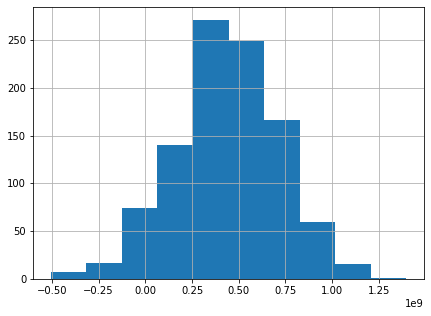

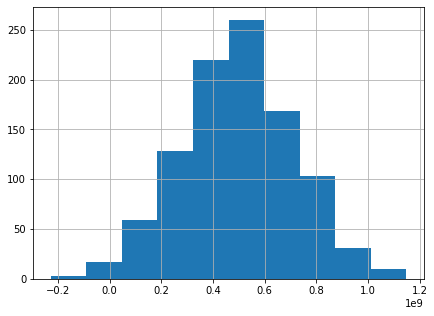

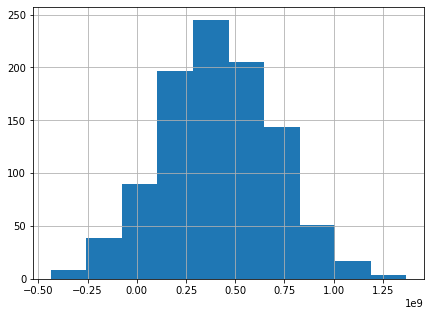

In [60]:
values = [values_0, values_1, values_2]

for value in values:
    plt.figure()
    value.hist(figsize=(7,5), bins=10)
    

Распределение средней прибыли похоже на нормальное, посчитаем 95% доверительный интервал c помощью st.t.interval

In [61]:
print("95%-ый доверительный интервал:")
print('Регион 1:',st.t.interval(0.95, len(values_0)-1, values_0.mean(), values_0.sem()))
print('Регион 2:',st.t.interval(0.95, len(values_1)-1, values_1.mean(), values_1.sem()))
print('Регион 3:',st.t.interval(0.95, len(values_2)-1, values_2.mean(), values_2.sem()))

95%-ый доверительный интервал:
Регион 1: (418761103.8826875, 453106440.3946366)
Регион 2: (485276591.4485457, 511861442.385031)
Регион 3: (394899268.950805, 430446529.02625877)


Рассчитаем риск убытков

In [62]:
print('Риск убытков в регионе:')
print('Регион 1:', (values_0[values_0 < 0].count() / len(values_0) *100), '%')
print('Регион 2:', (values_1[values_1 < 0].count() / len(values_1) *100), '%')
print('Регион 3:', (values_2[values_2 < 0].count() / len(values_2) *100), '%')

Риск убытков в регионе:
Регион 1: 6.1 %
Регион 2: 1.0 %
Регион 3: 7.000000000000001 %


In [63]:
print('Средняя выручка регионе:')
print('Регион 1:', values_0.mean())
print('Регион 2:', values_1.mean())
print('Регион 3:', values_2.mean())

Средняя выручка регионе:
Регион 1: 435933772.13866204
Регион 2: 498569016.91678834
Регион 3: 412672898.9885319


#### На основе проведенных расчетов можно сделать следующие выводы:
- самая высокая средняя прибыль в рамках 95% доверительного интервала у региона 2
- самые низкие риски убытков у региона 2 (1%) и региона 1 (6.1%), но поскольку по словию задачи рассматриваем только те регионы, где риски убытков меньше 2.5%, регион 1 выпадает из этого криетрия.
- самая высокая средняя предсказанная выручка в регионе 2.  
Таким образом, к разработке может быть предложен регион 2.

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован